<a href="https://colab.research.google.com/github/dcownden/PerennialProblemsOfLifeWithABrain/blob/main/Evolution_Sequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, interactive
import matplotlib.pyplot as plt
from IPython import display
from time import sleep
import scipy.stats as stats

!pip3 install vibecheck datatops
# Or do it this way to suppress output:
# !pip3 install vibecheck datatops > /dev/null 2> /dev/null

from vibecheck import DatatopsContentReviewContainer


In [2]:
def content_review(notebook_section: str):
    return DatatopsContentReviewContainer(
        "",  # No text prompt
        notebook_section,
        {
            "url": "https://pmyvdlilci.execute-api.us-east-1.amazonaws.com/klab",
            "name": "neuro_book",
            "user_key": "xuk960xj",
        },
    ).render()


### Seqeunce: Motivate within lifetime learning from an evolutionary perspective
#### Sequence Goals
1. Develop a sense of why brains might have evolved and what problems they solve. Ground this in evolutionary thinking, i.e., fitness cost/benefit analyses, dynamical systems, generational time scales, evolution tracking environmental change.
2. Build a simple evolutionary simulation that illustrates:  
> * How evolutionary algorithms can solve a problem
> * How within lifetime learning, in this case node perturbation, can also solve the same problem
> * How these two processes, evolution and within lifetime learning interact synergistically, each speeding each other up and making them more robust to environmental shifts
>* Under which conditions the somatic costs of within lifetime adaptation are "worth it" from a fitness perspective
3. Big idea, that comes later is the contrast between learning/evolution with Statistical Decision Theory. Both get to the same place, but learning/evolution has simple feedback based information of the environment, whereas Statistical Decision Theory is grounded in an omnicient observer perspective, these can be somewhat reconciled, but at some point the statistical decision theory approach must formalize it's ignorance/uncertainty, whereas this is more implicit (and ignorable) in iterative feedback based approaches. Evolution and learning focus on good enough and best so far in contrast to the provably the very best ever possible ever solution.


### Micro 1: Test-bed creature/environment/problem 
#### Micro Unit Goals
1. Soft intro to cost/reward functions, optimization, fitness, policy
2. Notion that a policy is suited to (adapted to) a particular environment

To start consider the simplest possible creature that might need a neuron. It has a single photo-sensitive cell, connected to a single neuron. The firing of this neuron causes the muscles of creature's mouth to lunge out and strike at its prey.

Picture of creature and "environment" when prey present relatively more light, when prey not present relatively less light

The distribution of light in the environment changes depending on whether or not prey is present. Based on this the creature "decides" whether or not to attempt to strike at the prey (if it's really there) or to lurk and conserve its energy.

If the prey is there and the creature strikes, the creature receives a reward, but if the creature strikes and the prey is not present this wastes some energy and the creature pays a cost. Conversely, regardless of whether or not the prey is present, lurking and waiting incurs the same cost or reward. In an evolutionary context these rewards and costs can typically be thought of as increments (decrements) to the creature's fitness or the number of offspring surviving to reproductive age, but for now let's just work with more points is better.

Picture of payoff matrix (maybe replaces much or all of the the previous paragraph with picture of the payoff matrix aka tabular reward function), is this where we want to define  the reward resulting from taking action $a$ when the environment is in state $s$ is $R(s,a)$ ?

Pick a threshold for striking below and see how your creature fares.

In [3]:
# uniform distribution of signal I think ditch this in favour of gaussian distribution of signal
@interact(threshold = (-1.0,11.0,0.5), 
          probPrey = (0.0,1.0,0.1), 
          numEpisodes = (1,200,1), 
          missCost = (-10,0,1), 
          preyReward = (0,10,1), 
          lurkCost = (-5, 5, 1),
          preyPresent_min = (0,10, 1),
          preyPresent_max = (0,10, 1),
          preyAbsent_min = (0,10, 1),
          preyAbsent_max = (0,10, 1))
def fitness(threshold, probPrey, numEpisodes, missCost, preyReward, lurkCost, preyPresent_min=4, preyPresent_max=8, preyAbsent_min=2, preyAbsent_max=6):  
  numFalseStrikes = 0
  numCaptures = 0
  numMissedOpportunities = 0
  numGoodLurks = 0
  
  for ii in range(numEpisodes):
    
    preyPresent =  (1 == np.random.binomial(1, probPrey))
    if preyPresent:
      x = np.random.uniform(low=preyPresent_min, high=preyPresent_max)
    else: # preyAbsent
      x = np.random.uniform(low=preyAbsent_min, high=preyAbsent_max)
    
    def pi(s, threshold):
      if x < threshold:
        return 'lurk'
      else: # x >= threshold
        return 'strike'
    
    action = pi(x, threshold)

    if action == 'strike' and preyPresent == True:
      numCaptures = numCaptures + 1
    elif action == 'strike' and preyPresent == False:
      numFalseStrikes = numFalseStrikes + 1
    elif action == 'lurk' and preyPresent == True:
      numMissedOpportunities = numMissedOpportunities + 1
    elif action == 'lurk' and preyPresent == False:
      numGoodLurks = numGoodLurks + 1
    else:
      print('This should never happen, what went wrong?')


  return({'False Strikes': numFalseStrikes,
          'Captures': numCaptures,
          'Missed Opportunities': numMissedOpportunities,
          'Well Timed Lurks': numGoodLurks,
          'Score': numFalseStrikes * missCost + numCaptures * preyReward + (numMissedOpportunities + numGoodLurks) * lurkCost})
#figure out how to 
#1) get range selectors instead of sliders for those min, max parameters to ensure the maximums are above the minimums, 
#12 link ranges of min max parameters are such that the orientation of the threshold doesn't change, i.e. it would be better to strike below the threshold and lurk above it
#2) how to format the labels of the sliders
#3) how to fix all of these parameters of these and just let pi be tweaked
#4) how to plot this nicely (distributions, threshold decision, all the false strikes, missed opportunities, well timed lurks, and captures)
#5) output as a confusion matrix, introduce confusion matrix in a mouse over, explicitly in the text, or save for later

{'False Strikes': 9,
 'Captures': 45,
 'Missed Opportunities': 5,
 'Well Timed Lurks': 41,
 'Score': 180}

interactive(children=(FloatSlider(value=5.0, description='threshold', max=11.0, min=-1.0, step=0.5), FloatSlid…

In [4]:
# gaussian distribution of signal I think use this in rather than uniform distribution of signal, leads to a less trival optimal solution
@interact(threshold = (-1.0,11.0,0.5), 
          probPrey = (0.0,1.0,0.1), 
          numEpisodes = (1,200,1), 
          missCost = (-10,0,1), 
          preyReward = (0,10,1), 
          lurkCost = (-5, 5, 1),
          mu_preyPresent = (0, 10, 1),
          sigma_preyPresent = (0.1, 4.0, 0.5),
          mu_preyAbsent = (0, 10, 1),
          sigma_preyAbsent = (0.1, 4.0, 0.5))
def fitness(threshold, probPrey, numEpisodes, missCost, preyReward, lurkCost, mu_preyPresent=6, sigma_preyPresent=1, mu_preyAbsent=4, sigma_preyAbsent=2):  
  numFalseStrikes = 0
  numCaptures = 0
  numMissedOpportunities = 0
  numGoodLurks = 0
  
  for ii in range(numEpisodes):
    
    preyPresent =  (1 == np.random.binomial(1, probPrey))
    if preyPresent:
      x = np.random.normal(loc=mu_preyPresent, scale=sigma_preyPresent)
    else: # preyAbsent
      x = np.random.normal(loc=mu_preyAbsent, scale=sigma_preyAbsent)
    
    def pi(s, threshold):
      if x < threshold:
        return 'lurk'
      else: # x >= threshold
        return 'strike'
    
    action = pi(x, threshold)

    if action == 'strike' and preyPresent == True:
      numCaptures = numCaptures + 1
    elif action == 'strike' and preyPresent == False:
      numFalseStrikes = numFalseStrikes + 1
    elif action == 'lurk' and preyPresent == True:
      numMissedOpportunities = numMissedOpportunities + 1
    elif action == 'lurk' and preyPresent == False:
      numGoodLurks = numGoodLurks + 1
    else:
      print('This should never happen, what went wrong?')


  return({'False Strikes': numFalseStrikes,
          'Captures': numCaptures,
          'Missed Opportunities': numMissedOpportunities,
          'Well Timed Lurks': numGoodLurks,
          'Score': numFalseStrikes * missCost + numCaptures * preyReward + (numMissedOpportunities + numGoodLurks) * lurkCost})
#figure out how to 
#1) get range selectors instead of sliders for those min, max parameters to ensure the maximums are above the minimums, 
#12 link ranges of min max parameters are such that the orientation of the threshold doesn't change, i.e. it would be better to strike below the threshold and lurk above it
#2) how to format the labels of the sliders
#3) how to fix all of these parameters of these and just let pi be tweaked
#4) how to plot this nicely (distributions, threshold decision, all the false strikes, missed opportunities, well timed lurks, and captures)
#5) output as a confusion matrix, introduce confusion matrix in a mouse over, explicitly in the text, or save for later

{'False Strikes': 8,
 'Captures': 43,
 'Missed Opportunities': 6,
 'Well Timed Lurks': 43,
 'Score': 175}

interactive(children=(FloatSlider(value=5.0, description='threshold', max=11.0, min=-1.0, step=0.5), FloatSlid…

Questions For Now 
1. Leaving the environmental parameters at their initial default values of blah experiment until you have a good idea of what the optimal threshold is
2. Set the parameters so that the creature never has False Strikes or Missed Opportunities. In this case what is true about the relative ordering of `prey_present_min`, `prey_absent_max,` and `threshold`.
3. a) Set the threshold to 11, i.e. an (almost) always strike policy given the range of light intensities possible, and adjust the environmental parameters such that this always strike policy is optimal. b) Now set the threshold to -1, i.e. an (almost) always lurk policy, and adjust the environmental parameters such that this always lurk policy is optimal.
4. What kind of environments don't require a decision based on inputs, i.e. where a policy of always strike or an always lurk is optimal? Answer (Constant environment (prey always there or never there), variable environment but differences not detactable (i.e. distribution overlap perfectly), variable environment with detactable variation but either cost of missing is so low relative to reward that better to always strike, or cost of missing is so high relative to reward that better to always lurk, actions are irrelevant because actions all give the same payoffs regardless of the state of the environment,

Questions For Later
1. a) Calculate the provably optimal threshold in this particular case and b) as general function of the parameters. (save this for later as an opportunity to introduce bayes rule, and statistical decision theory?)
2. a) Given the nature of the actions and perceptions available give reasons why a threshold policy is optimal. b) What would have to be true about the distributions of light intensity in the absense/precense of prey for something other than a simple threshold policy to be the optimal policy? ... or ...

In [5]:
content_review("Micro 1: Test-bed creature/environment/problem")

### Micro 2: Evolutionary algorithm aka evolution simulator 
#### Micro Unit Goals
1. Build an evolution simulator / implement an evolutionary algorithm to solve a problem
2. Reproduction, heritable variation, selection as capital "E" evolution as contrasted with the unfolding or  evolution of any dynamical system
3. Develop a sense of the time in terms of generations that it takes for the evolutionary algorithm to track the environment, and connect this to a changing environment, i.e. at what point is evolution too slow to keep up with the environment, play with shorter generations

An evolutionary process consists of reproduction, heritable variation, and selection. We're going to implement an evolutionary process to see how this causes the population to converge on the optimal strategy for the given environment. The fitness fucntion for creatures as described above is as follows

In [6]:
def fitnessTerse(threshold, environmentParams):  
  probPrey = environmentParams['probPrey']
  numEpisodes = environmentParams['numEpisodes']
  missCost = environmentParams['missCost']
  preyReward = environmentParams['preyRewards']
  lurkCost = environmentParams['lurkCost']
  mu_preyPresent = environmentParams['mu_preyPresent']
  sigma_preyPresent = environmentParams['sigma_preyPresent']
  mu_preyAbsent = environmentParams['mu_preyAbsent']
  sigma_preyAbsent = environmentParams['sigma_preyAbsent']

  numFalseStrikes = 0
  numCaptures = 0
  numMissedOpportunities = 0
  numGoodLurks = 0
  
  for ii in range(numEpisodes):
    
    preyPresent =  (1 == np.random.binomial(1, probPrey))
    if preyPresent:
      x = np.random.normal(loc=mu_preyPresent, scale=sigma_preyPresent)
    else: # preyAbsent
      x = np.random.normal(loc=mu_preyAbsent, scale=sigma_preyAbsent)

    def pi(s, threshold):
      if x < threshold:
        return 'lurk'
      else: # x >= threshold
        return 'strike'
    
    action = pi(s, threshold)

    if action == 'strike' and preyPresent == True:
      numCaptures = numCaptures + 1
    elif action == 'strike' and preyPresent == False:
      numFalseStrikes = numFalseStrikes + 1
    elif action == 'lurk' and preyPresent == True:
      numMissedOpportunities = numMissedOpportunities + 1
    elif action == 'lurk' and preyPresent == False:
      numGoodLurks = numGoodLurks + 1
    else:
      print('This should never happen, what went wrong?')

  fitnessScore = (numFalseStrikes * missCost + 
                  numCaptures * preyReward + 
                  (numMissedOpportunities + numGoodLurks) * lurkCost) 
  return(fitnessScore)

In [7]:
def fitnessFast(thresholds, environmentParams):  
  probPrey = environmentParams['probPrey']
  numEpisodes = environmentParams['numEpisodes']
  missCost = environmentParams['missCost']
  preyReward = environmentParams['preyRewards']
  lurkCost = environmentParams['lurkCost']
  mu_preyPresent = environmentParams['mu_preyPresent']
  sigma_preyPresent = environmentParams['sigma_preyPresent']
  mu_preyAbsent = environmentParams['mu_preyAbsent']
  sigma_preyAbsent = environmentParams['sigma_preyAbsent']
  #preyPresent_min = environmentParams['preyPresent_min']
  #preyPresent_max = environmentParams['preyPresent_max']
  #preyAbsent_min = environmentParams['preyAbsent_min']
  #preyAbsent_max = environmentParams['preyAbsent_max']
  
  numCreatures = len(thresholds)
  preyPresent = np.random.binomial(1, probPrey, size=(numEpisodes, numCreatures))
  
  mus = np.zeros((numEpisodes, numCreatures))
  sigmas = np.zeros((numEpisodes, numCreatures))
  mus[preyPresent == 1] = mu_preyPresent
  mus[preyPresent == 0] = mu_preyAbsent
  sigmas[preyPresent == 1] = sigma_preyPresent
  sigmas[preyPresent == 0] = sigma_preyAbsent
  x = np.random.normal(loc=mus, scale=sigmas)
  
  a = np.zeros((numEpisodes, numCreatures))
  a[x>thresholds] = 1 # 1's indicate a strike 0's a lurk
  
  numCaptures = np.sum((a==1) * (preyPresent==1), axis=0)
  numFalseStrikes = np.sum((a==1) * (preyPresent==0), axis=0)
  numMissedOpportunities = np.sum((a==0) * (preyPresent==1), axis=0)
  numGoodLurks = np.sum((a==0) * (preyPresent==0), axis=0)
  #assert numEpisodes*numCreatures == numCaptures + numFalseStrikes + numMissedOpportunities + numGoodLurks

  fitnessScores = (numFalseStrikes * missCost + 
                  numCaptures * preyReward + 
                  (numMissedOpportunities + numGoodLurks) * lurkCost) 
  return(fitnessScores)

In [8]:
# get them to code this themselves
def evolutionGeneration(populationThresholds, 
                        environmentParams,
                        evolutionParams):
  mutationRate = evolutionParams['mutationRate']
  mutationStep = evolutionParams['mutationStep']
  
  numCreatures = len(populationThresholds)

  # How well does each creature do at obtaining resources
  populationFitnessScores = fitnessFast(populationThresholds, environmentParams)
  populationFitnessScores[populationFitnessScores < 0.01] = 0.01
  #populationFitnessScores = np.zeros(len(populationThresholds))
  #for ii, threshold_ in enumerate(populationThresholds):
  #  populationFitnessScores[ii] = fitnessTerse(threshold_, environmentParams)
    
  # Choose parents for the next generation based on fitnessScore
  newPopulationThresholds = np.random.choice(populationThresholds, 
                                             size=numCreatures, 
                                             replace=True,
                                             p=populationFitnessScores / np.sum(populationFitnessScores))
  # add mutation
  mutants = np.random.binomial(1, mutationRate, size=numCreatures)
  numMutants = np.sum(mutants)
  newPopulationThresholds[mutants == 1] = newPopulationThresholds[mutants == 1] + np.random.normal(loc=0.0, scale=mutationStep, size=numMutants)
  #newPopulationThresholds = np.zeros(len(populationThresholds))
  #for ii in range(len(populationFitnessScores)):
  #  parentThreshold = np.random.choice(populationThresholds, size=None, replace=True, p=populationFitnessScores/populationFitnessScores.sum())
    # Is the child a mutant
  #  if np.random.binomial(1, mutationRate) == 1:
      #Mutant!
  #    newPopulationThresholds[ii] = parentThreshold + np.random.normal(loc=0.0, scale=mutationStep)
  #  else:
      #Not a mutant
  #    newPopulationThresholds[ii] = parentThreshold
  return(newPopulationThresholds, populationFitnessScores)        

In [9]:
environmentParams = {
    'probPrey': 0.6,
    'numEpisodes': 100, 
    'missCost': -3.0,
    'preyRewards': 5.0,
    'lurkCost': 0.0,
    'mu_preyPresent': 6.0,
    'sigma_preyPresent': 1.0,
    'mu_preyAbsent': 4.0,
    'sigma_preyAbsent': 2.0,
    'preyPresent_min': 4.0,
    'preyPresent_max': 8.0,
    'preyAbsent_min': 2.0,
    'preyAbsent_max': 5.0} 
evolutionParams = {
    'populationSize': 200,
    'numGenerations': 20000,
    'mutationRate': 0.01,
    'mutationStep': 0.2}
populationThresholds = np.random.uniform(low=4, high=6, size=evolutionParams['numGenerations'])
print(populationThresholds)
fitnessFast(populationThresholds, environmentParams)
evolutionGeneration(populationThresholds, 
                    environmentParams,
                    evolutionParams)

[5.86317326 5.79365996 4.52614588 ... 4.6892813  4.56231489 5.07141548]


(array([4.16802763, 4.97762688, 5.86615865, ..., 5.91191512, 4.40421925,
        4.57945942]),
 array([150., 171., 195., ..., 230., 222., 219.]))

In [10]:
def runEvolution(initialThresholdLowerBound = 6.0,
                 initialThresholdUpperBound = 8.0, 
                 environmentParams = {
                    'probPrey': 0.6,
                    'numEpisodes': 100, 
                    'missCost': -4.0,
                    'preyRewards': 5.0,
                    'lurkCost': 0.0,
                    'mu_preyPresent': 6.0,
                    'sigma_preyPresent': 1.0,
                    'mu_preyAbsent': 4.0,
                    'sigma_preyAbsent': 2.0}, 
                 evolutionParams = {
                    'populationSize': 200,
                    'numGenerations': 500,
                    'mutationRate': 0.01,
                    'mutationStep': 0.2}
                 ):
  
  populationThresholds = np.random.uniform(low=initialThresholdLowerBound, 
                                           high=initialThresholdUpperBound, 
                                           size=evolutionParams['populationSize'])
  meanFitness = []
  medFitness = []
  meanThreshold = []
  medThreshold = []
  plt.axis([0, evolutionParams['numGenerations'], 0, 10])
  
  for ii in range(evolutionParams['numGenerations']):
    populationThresholds, populationFitnessScores = evolutionGeneration(populationThresholds, environmentParams, evolutionParams)
    meanFitness.append(np.mean(populationFitnessScores))
    medFitness.append(np.median(populationFitnessScores))
    meanThreshold.append(np.mean(populationThresholds))
    medThreshold.append(np.median(populationThresholds))
    if np.mod(ii,10) == 0:
      plt.plot(meanThreshold, color = 'blue')
      display.display(plt.gcf())
      display.clear_output(wait=True)
      sleep(0.05)
    #print(ii)
    #print(np.mean(populationThresholds))
    #print(np.mean(populationFitnessScores))

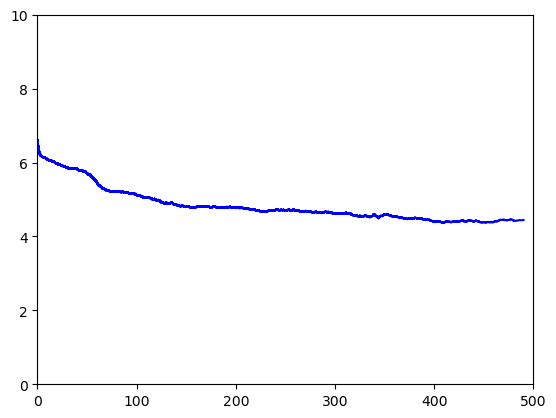

In [11]:
runEvolution()  

Important to have the theortically correct optimal threshold as a function of the parameters, but we likely want to tuck this in appendix or use it as an intro to using Bayes rule to maximize expected returns

picture of the game tree, 

nature makes a move and either the prey is present, call this state $s_1$, with probability $p(s_1)$, or prey is absent with probability $1-p(s_1)$, call this state $s_2$. Then a signal, $x$, is generated by the interaction of the photosensitive cell with the environment the strenght of which has the distribution:

$$p(x|s_1) = \frac{1}{\sigma_1\sqrt{2\pi}} 
  \exp\left( -\frac{1}{2}\left(\frac{x-\mu_1}{\sigma_1}\right)^{2}\,\right)
$$


$$p(x|s_2) = \frac{1}{\sigma_2\sqrt{2\pi}} 
  \exp\left( -\frac{1}{2}\left(\frac{x-\mu_2}{\sigma_2}\right)^{2}\,\right)
$$
where $\mu_i$ and $\sigma_i$ are the mean and standard deviation of the gaussian signal distribution for the corresponding states indexed by $i \in \{1, 2\}$

How should an observation of given a signal $x$ change the belief that prey is present or absent, i.e. that $s_1$ or $s_2$ is the case. Specifically, prior to the observation $x$, the baseline probability of $s_1$ being the case is $q$, and we would like to know the probability of $p(s_1|x)$, which is given by Bayes' rule


$$p(s_1|x) p(x) = p(s_1, x) = p(x|s_1) p(s_1)$$

ignoring the middle term (which is just there to remind us that the LHS and the RHS are equal to eachother because they are different ways of expressing the joint probability density of $s_1$ and $x$ being the case at the same time, in terms of the conditional and and marginal probability densities, we can rearrange to solve for the term we want 

$$p(s_1|x) = \frac{p(x|s_1) p(s_1)}{p(x)}$$

at first it may seem like we don't know $p(x)$ but because there are only two states $s_1$ and $s_2$ it is easy to consider all possible states that give rise to $x$ and write down its (compound) distribution.

$$p(s_1|x) = \frac{p(x|s_1) p(s_1)}{p(x|s_1) p(s_1) + p(x|s_2) p(s_2) }$$



In [12]:
def conditionalProbPrey(x, environmentParams = {
    'probPrey': 0.6,
    'numEpisodes': 100, 
    'missCost': -4.0,
    'preyRewards': 5.0,
    'lurkCost': 0.0,
    'mu_preyPresent': 6.0,
    'sigma_preyPresent': 1.0,
    'mu_preyAbsent': 4.0,
    'sigma_preyAbsent': 2.0}):
  probPrey = environmentParams['probPrey']
  mu_preyPresent = environmentParams['mu_preyPresent']
  sigma_preyPresent = environmentParams['sigma_preyPresent']
  mu_preyAbsent = environmentParams['mu_preyAbsent']
  sigma_preyAbsent = environmentParams['sigma_preyAbsent']
  
  preyPresentPart = stats.norm.pdf(x, loc=mu_preyPresent, scale=sigma_preyPresent) * probPrey 
  preyAbsentPart = stats.norm.pdf(x, loc=mu_preyAbsent, scale=sigma_preyAbsent) * (1-probPrey)
  return(preyPresentPart / (preyPresentPart + preyAbsentPart))

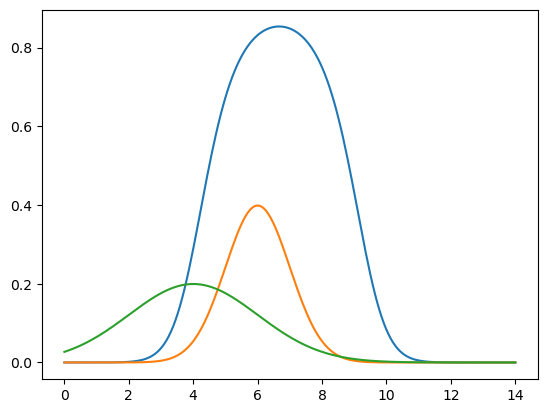

In [13]:
environmentParams = {
    'probPrey': 0.6,
    'numEpisodes': 100, 
    'missCost': -4.0,
    'preyRewards': 5.0,
    'lurkCost': 0.0,
    'mu_preyPresent': 6.0,
    'sigma_preyPresent': 1.0,
    'mu_preyAbsent': 4.0,
    'sigma_preyAbsent': 2.0}
probPrey = environmentParams['probPrey']
mu_preyPresent = environmentParams['mu_preyPresent']
sigma_preyPresent = environmentParams['sigma_preyPresent']
mu_preyAbsent = environmentParams['mu_preyAbsent']
sigma_preyAbsent = environmentParams['sigma_preyAbsent']
x = np.linspace(0,14,200)
plt.plot(x, conditionalProbPrey(x))
plt.plot(x, stats.norm.pdf(x, loc=mu_preyPresent, scale=sigma_preyPresent))
plt.plot(x, stats.norm.pdf(x, loc=mu_preyAbsent, scale=sigma_preyAbsent))

Now that we know what the observation of $x$ tells us about the state of the environment, we can ask what the expected value of taking a given actions "strike" or "lurk" for a given value of $x$. The expected reward from striking is $$\mathbb{E} \left[ R | \text{strike}, x \right] = p(s_1|x) \cdot r - \left(1-p(s_1|x)\right) \cdot c$$
where $r$ and $c$ are the reward for capturing a prey and the cost of striking at missing prey respectively. The expected value of lurking $$\mathbb{E} \left[ R | \text{lurk}, x \right] = l $$ is constant value $l$, i.e. the same regardless of whether or not prey are present, for simplicity let's set $l=0$ for now.

Then for a given value of x striking is better than lurking whenever

$$ $$

Then letting $q$

In [14]:
def conditionalExpectedValue(x, environmentParams = {
    'probPrey': 0.6,
    'numEpisodes': 100, 
    'missCost': -4.0,
    'preyRewards': 5.0,
    'lurkCost': 0.0,
    'mu_preyPresent': 6.0,
    'sigma_preyPresent': 1.0,
    'mu_preyAbsent': 4.0,
    'sigma_preyAbsent': 2.0}):
  conditionalProbPrey_x = conditionalProbPrey(x, environmentParams)
  strikeEV = conditionalProbPrey_x * environmentParams['preyRewards'] + (1-conditionalProbPrey_x) * environmentParams['missCost']
  lurkEV = conditionalProbPrey_x * environmentParams['lurkCost'] + (1-conditionalProbPrey_x) * environmentParams['lurkCost']
  return(strikeEV, lurkEV)

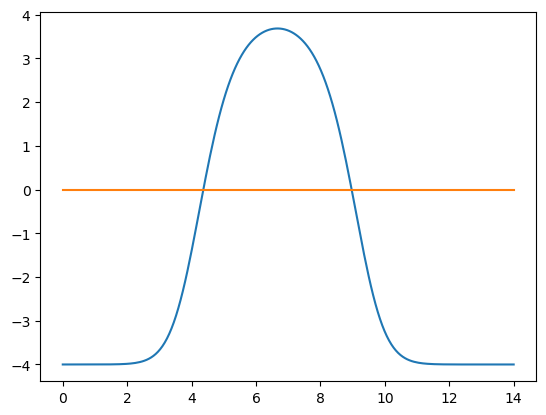

In [15]:
x = np.linspace(0,14,200)
strikeEV, lurkEV = conditionalExpectedValue(x)
plt.plot(x, strikeEV)
plt.plot(x, lurkEV)

In [16]:
stats.norm.pdf(x=2, loc=1, scale=2)

0.17603266338214976

??? inputs to function the conventional $x$ for experience or $s$ for state and signal, I think use $s$ when dealing with the fully observable case where state and signal are 1-1 but use x when in the partially observable case and s ???

In [17]:
help(np.random.normal)

Help on built-in function normal:

normal(...) method of numpy.random.mtrand.RandomState instance
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).
    
    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.
    
    .. note::
        New code should use the ``normal`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    loc : float or array_like of floats
        Mean ("centre") of the distribution

Is it worth calling out the confusion matrix false positive, false negative, true positive, true negative, etc. explicity now, or saving that for later?

#OLD

nature makes a move and either the prey is present, call this state $s_1$, with probability $q$, or prey is absent with probability $1-q$, call this state $s_2$. Then a signal, $x$, is generated by the interaction of the photosensitive cell with the environment the strenght of which has the distribution:

$$p(x|s_1) = \begin{cases}
      \frac{1}{U_1 - L_1} & \text{for } L_1 \leq x \leq U_1 \\
      0 & \text {for } x < L_1 \text{ or } x > U_1
    \end{cases}$$


$$p(x|s_2) = \begin{cases}
      \frac{1}{U_2 - L_2} & \text{for } L_2 \leq x \leq U_2 \\
      0 & \text {for } x < L_2 \text{ or } x > U_2
    \end{cases}$$
where $U_i$ and $L_i$ are the upper and lower bounds of the uniform signal distribution for the corresponding states indexed by $i \in \{1, 2\}$

The purpose of a brain is contingent action. There is no point in percieving the environment if it is always constant. If the environment is variable, there is still no point in percieving these environmental differences the creature preciveing these difference is also capable of different actions, which are differently suited to the different states of the unless of different behaviours that are better suited  to the state of the environment. alter behavior The goal here is to build the simplest possible example of a creature interacting with an environment, and to understand under what conditions it even needs to have a brain in the first place. The environment is variable, the creature has more than one action it can take, the actions have different variables depending on the state of the environment

Picture of Environment Photo-receptor cell, single neuron, mouth/muscles.